In [1]:
# Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale


In [2]:
data_df = pd.read_csv('./marketing-outliers.csv')
data_df.head(1)

,tv,web,radio,sales
0,0.916,1.689,0.208,1.204


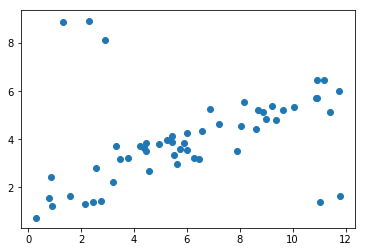

In [3]:
x = data_df.tv.values
y = data_df.sales.values

plt.scatter(x,y)
plt.show()


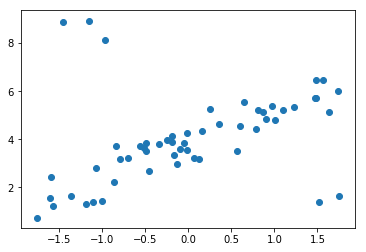

In [4]:
x_scale = scale(data_df.tv.values)
plt.scatter(x_scale,y)
plt.show()

In [5]:
from sklearn.linear_model import SGDRegressor

In [6]:
lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=1000, tol=1e-3)

In [7]:
lr_huber.fit(x[:,np.newaxis],y)
# Print the slope of the line
print('Slope:', lr_huber.coef_)
# Output varies around 1.125

# Print the intercept parameter
print('Intercept term:', lr_huber.intercept_)
# Output varies around 3.787

Slope: [0.49389839]
Intercept term: [0.66393039]


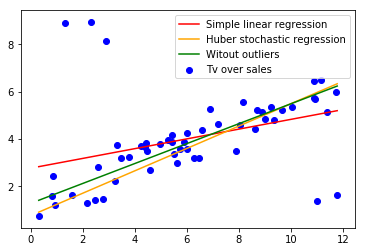

In [8]:
# Linear regression using np.polyfit
poly_coefs = np.polyfit(x,y,deg=1)
poly_x = np.linspace(x.min(),x.max(),100)
poly_y = np.polyval(poly_coefs,poly_x)

plt.plot(poly_x,poly_y,c='r',label='Simple linear regression')

# Linear regression using Huber
lr_huber.fit(x[:,np.newaxis],y)
huber_coefs = (lr_huber.coef_,lr_huber.intercept_)
huber_x = np.linspace(x.min(),x.max(),100)
huber_y = np.polyval(huber_coefs,huber_x)
plt.plot(huber_x,huber_y, c='orange', label = 'Huber stochastic regression')

# without outliers
# Linear regression without outliers
coefs = np.polyfit(
    x[:-5], y[:-5], # Filter outliers (the last five values)
    deg=1
)
y_values_optimal = np.polyval(coefs, poly_x)
plt.plot(poly_x,y_values_optimal,c='green',label='Witout outliers')

plt.scatter(x,y,c='b',label='Tv over sales')

plt.legend()
plt.show()

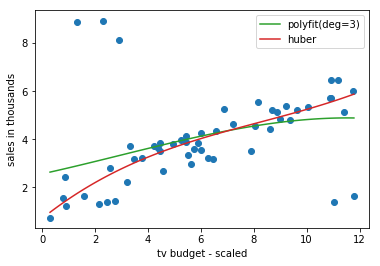

In [18]:
x_values = np.linspace(min(x), max(x), num=100)

from sklearn.linear_model import HuberRegressor
lr_huber = HuberRegressor(epsilon=1.35)
# lr_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1.35, max_iter=100, tol=1e-3) # Why this doesn't work ??

# Fit a polynomial of degree 3
x_poly = np.c_[x, x**2, x**3] # Feature engineering
lr_huber.fit(x_poly, y)
y_values_huber = lr_huber.predict(np.c_[x_values, x_values**2, x_values**3])

# Same with polyfit
coefs = np.polyfit(x, y, deg=3)
y_values_polyfit = np.polyval(coefs, x_values)

# Plot it
plt.scatter(x, y)
plt.plot(x_values, y_values_polyfit, c='C2', label='polyfit(deg=3)')
plt.plot(x_values, y_values_huber, c='C3', label='huber')
plt.xlabel('tv budget - scaled')
plt.ylabel('sales in thousands')
plt.legend()
plt.show()
# You should see a "robust" poly. curve of degree 3
# Challenge: compare the result with polyfit(deg=3)!